# Results

In this notebook we will perform results analysis comparing the performance of different optimization algorithms - Genetic Algorithms with different operators and parameters, Simulated Annealing and Hill Climbing.

# 1. Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
import itertools
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import multipletests
import seaborn as sns

In [ ]:
from library.LUSolution import *

In [ ]:
from library.selection_and_operators.mutation import *
from library.selection_and_operators.crossover import *
from library.selection_and_operators.selection import tournament_selection
from library.algorithms import *

In [ ]:
from library.results_functions import *

# 2. Genetic Algorithms

Baseline parameters:
- POP_SIZE = 50, 
- CROSSOVER_FUNCTION = cycle_crossover,
- MUTATION_FUNCTION = shuffle_mutation,
- NUMBER_OF_TESTS=30,
- MAX_GEN=100,
- S_RANKING_SELECTION=1.5,
- K_TOURNEMENT_SELECTION=5,
- SELECTION_ALGORITHM=tournament_selection,
- XO_PROB=0.9,
- MUT_PROB=0.4,
- MUT_MAX_WINDOW_SIZE=5, 
- ELITISM = True,
- VERBOSE = False

### Test crossover, mutation operators and probabilities:

Operators to test:

- Mutation: swap_slots_mutation, inversion_mutation, shuffle_mutation
- Crossover: cycle_crossover, partially_matched_crossover, swap_time_slots_crossover

In [9]:
MAX_GEN=100
NUMBER_OF_TESTS=30

In [ ]:
# grid with elitism = True
grid_params = {
    "crossover": [
        {
            "function": partially_matched_crossover,
            "xo_prob": 0.9
        },
        {
            "function": swap_time_slots_crossover,
            "xo_prob": 0.9
        }
    ],
    "mutation": [
        {
            "function": swap_stages_slots_mutation,
            "mut_prob": 0.6
        },
        {
            "function": inversion_mutation,
            "mut_prob": 0.25
        },

        {
            "function": shuffle_mutation,
            "mut_prob": 0.25
        }


    ],
    "elitism": [True]
}

In [ ]:
all_results_test1=[] # list to store the results for all the experiments
grid = list(itertools.product(grid_params["crossover"], grid_params["mutation"], grid_params["elitism"]))
fitness_dfs = {}

for crossover_cfg, mutation_cfg, elitism in grid:

    crossover_function = crossover_cfg["function"]
    xo_prob = crossover_cfg["xo_prob"]
    mutation_function = mutation_cfg["function"]
    mut_prob = mutation_cfg["mut_prob"]
    experiment_name = f"{mutation_function.__name__}{mut_prob}__{crossover_function.__name__}{xo_prob}__el_{elitism}"
    print(f"\n\nRunning experiment: {experiment_name}")
    
    result = run_experiment_ga(
        EXPERIMENT_NAME=experiment_name,
        MUTATION_FUNCTION=mutation_function,
        CROSSOVER_FUNCTION=crossover_function,
        MUT_PROB=mut_prob,
        XO_PROB=xo_prob,
        MAX_GEN=MAX_GEN,
        NUMBER_OF_TESTS=NUMBER_OF_TESTS,
        ELITISM=elitism
    )
    all_results_test1.append(result)
    fitness_dfs[experiment_name] = result['df']




Running experiment: swap_stages_slots_mutation0.6__partially_matched_crossover0.9__el_True

Iteration 0 of the genetic algorithm

Final best individual in generation 1: 0.6828907767720013
Final best individual in generation 2: 0.6828907767720013
Final best individual in generation 3: 0.6828907767720013
Final best individual in generation 4: 0.7259586913093622
Final best individual in generation 5: 0.7259586913093622
Final best individual in generation 6: 0.7272606781922635
Final best individual in generation 7: 0.7376900063519356
Final best individual in generation 8: 0.7457771248187393
Final best individual in generation 9: 0.7513927671382032
Final best individual in generation 10: 0.7613731893377266
Final best individual in generation 11: 0.7676867259883419
Final best individual in generation 12: 0.7676867259883419
Final best individual in generation 13: 0.7761070177780526
Final best individual in generation 14: 0.7769610457844459
Final best individual in generation 15: 0.796331736

In [ ]:
MAX_GEN=100
NUMBER_OF_TESTS=30

In [ ]:
grid_params = {
    "crossover": [
        {
            "function": partially_matched_crossover,
            "xo_prob": 0.9
        },
        {
            "function": swap_time_slots_crossover,
            "xo_prob": 0.9
        }
    ],
    "mutation": [
        {
            "function": swap_stages_slots_mutation,
            "mut_prob": 0.6
        },
        {
            "function": inversion_mutation,
            "mut_prob": 0.25
        },

        {
            "function": shuffle_mutation,
            "mut_prob": 0.25
        }


    ],
    "elitism": [False]
}

In [ ]:
all_results_test2=[] # list to store the results for all the experiments
grid = list(itertools.product(grid_params["crossover"], grid_params["mutation"], grid_params["elitism"]))
fitness_dfs={} #store the results
# Run experiment to test all the different combinations of parameters in the grid
for crossover_cfg, mutation_cfg, elitism in grid:

    crossover_function = crossover_cfg["function"]
    xo_prob = crossover_cfg["xo_prob"]
    mutation_function = mutation_cfg["function"]
    mut_prob = mutation_cfg["mut_prob"]
    experiment_name = f"{mutation_function.__name__}{mut_prob}__{crossover_function.__name__}{xo_prob}__{elitism}"
    print(f"\n\nRunning experiment: {experiment_name}")
    
    result = run_experiment_ga(
        EXPERIMENT_NAME=experiment_name,
        MUTATION_FUNCTION=mutation_function,
        CROSSOVER_FUNCTION=crossover_function,
        MUT_PROB=mut_prob,
        XO_PROB=xo_prob,
        MAX_GEN=MAX_GEN,
        NUMBER_OF_TESTS=NUMBER_OF_TESTS,
        ELITISM=elitism
    )
    all_results_test2.append(result)
    fitness_dfs[experiment_name] = result['df']




Running experiment: swap_stages_slots_mutation0.6__partially_matched_crossover0.9__False

Iteration 0 of the genetic algorithm

Final best individual in generation 1: 0.6756716678236664
Final best individual in generation 2: 0.689386315939884
Final best individual in generation 3: 0.7098255812251756
Final best individual in generation 4: 0.7021896741977877
Final best individual in generation 5: 0.7227180527383368
Final best individual in generation 6: 0.7347186772677894
Final best individual in generation 7: 0.7338838983869409
Final best individual in generation 8: 0.7299631182522269
Final best individual in generation 9: 0.7344221432415331
Final best individual in generation 10: 0.7496109901135092
Final best individual in generation 11: 0.7511470884238012
Final best individual in generation 12: 0.7569227691076431
Final best individual in generation 13: 0.7693140800270676
Final best individual in generation 14: 0.7664465786314526
Final best individual in generation 15: 0.773857227620

In [ ]:
def avg_elapsed_time_table(all_results):
    pd.set_option('display.max_colwidth', None)
    data = []
    for result in all_results:
        data.append({
            "Experience Name": result['name'],
            "Elapsed Time Avg": result['avg_elapsed_time']
        })
    avg_elapsed_time = pd.DataFrame(data)
    avg_elapsed_time.index = range(1, len(all_results)+1)
    return avg_elapsed_time

In [ ]:
avg_elapsed_time_table(all_results=all_results_test1)

Experience Name  \
1  swap_stages_slots_mutation0.6__partially_matched_crossover0.9__el_True   
2         inversion_mutation0.25__partially_matched_crossover0.9__el_True   
3           shuffle_mutation0.25__partially_matched_crossover0.9__el_True   
4    swap_stages_slots_mutation0.6__swap_time_slots_crossover0.9__el_True   
5           inversion_mutation0.25__swap_time_slots_crossover0.9__el_True   
6             shuffle_mutation0.25__swap_time_slots_crossover0.9__el_True   

   Elapsed Time Avg  
1         55.396368  
2         53.216690  
3         53.705165  
4         53.907018  
5         75.031230  
6         55.771556

In [ ]:
avg_elapsed_time_table(all_results=all_results_test2)

Experience Name  \
1  swap_stages_slots_mutation0.6__partially_matched_crossover0.9__False   
2         inversion_mutation0.25__partially_matched_crossover0.9__False   
3           shuffle_mutation0.25__partially_matched_crossover0.9__False   
4    swap_stages_slots_mutation0.6__swap_time_slots_crossover0.9__False   
5           inversion_mutation0.25__swap_time_slots_crossover0.9__False   
6             shuffle_mutation0.25__swap_time_slots_crossover0.9__False   

   Elapsed Time Avg  
1         53.211627  
2         57.630213  
3         87.398731  
4        112.538197  
5        100.920927  
6         82.782599

# 3. Hill Climbing

In [39]:
MAX_ITER=100
NUMBER_OF_TESTS=30

In [ ]:
result_hc=run_experiment_hc(
EXPERIMENT_NAME = f"hc",
NUMBER_OF_TESTS=NUMBER_OF_TESTS,
MAX_GEN=MAX_ITER) # test hill climbing


Iteration 0 of the HC algorithm


Iteration 1 of the HC algorithm


Iteration 2 of the HC algorithm


Iteration 3 of the HC algorithm


Iteration 4 of the HC algorithm


Iteration 5 of the HC algorithm


Iteration 6 of the HC algorithm


Iteration 7 of the HC algorithm


Iteration 8 of the HC algorithm


Iteration 9 of the HC algorithm


Iteration 10 of the HC algorithm


Iteration 11 of the HC algorithm


Iteration 12 of the HC algorithm


Iteration 13 of the HC algorithm


Iteration 14 of the HC algorithm


Iteration 15 of the HC algorithm


Iteration 16 of the HC algorithm


Iteration 17 of the HC algorithm


Iteration 18 of the HC algorithm


Iteration 19 of the HC algorithm


Iteration 20 of the HC algorithm


Iteration 21 of the HC algorithm


Iteration 22 of the HC algorithm


Iteration 23 of the HC algorithm


Iteration 24 of the HC algorithm


Iteration 25 of the HC algorithm


Iteration 26 of the HC algorithm


Iteration 27 of the HC algorithm


Iteration 28 of the HC algori

# 4. Simulated Annealing

In [41]:
MAX_ITER=100
NUMBER_OF_TESTS=30
C=[1.5, 2.5]
L=[10, 25]
H=[5, 20]

In [ ]:
all_results_sa=[]
fitness_dfs_sa = {}

# test different combinations of parameters for SA
for c in C:
    for l in L:
        for h in H:
            experiment_name=f"sa__C_{c}__L_{l}__H_{h}"
            print(f"\n\nRunning experiment: {experiment_name}")
            result=run_experiment_sa(
            EXPERIMENT_NAME = experiment_name,
            NUMBER_OF_TESTS=NUMBER_OF_TESTS,
            MAX_GEN=MAX_ITER,
            C=c,
            L=l,
            H=h,
            VERBOSE=False)
            all_results_sa.append(result)
            fitness_dfs_sa[experiment_name]=result['df']



Running experiment: sa__C_1.5__L_10__H_5

Iteration 0 of the SA algorithm


Iteration 1 of the SA algorithm


Iteration 2 of the SA algorithm


Iteration 3 of the SA algorithm


Iteration 4 of the SA algorithm


Iteration 5 of the SA algorithm


Iteration 6 of the SA algorithm


Iteration 7 of the SA algorithm


Iteration 8 of the SA algorithm


Iteration 9 of the SA algorithm


Iteration 10 of the SA algorithm


Iteration 11 of the SA algorithm


Iteration 12 of the SA algorithm


Iteration 13 of the SA algorithm


Iteration 14 of the SA algorithm


Iteration 15 of the SA algorithm


Iteration 16 of the SA algorithm


Iteration 17 of the SA algorithm


Iteration 18 of the SA algorithm


Iteration 19 of the SA algorithm


Iteration 20 of the SA algorithm


Iteration 21 of the SA algorithm


Iteration 22 of the SA algorithm


Iteration 23 of the SA algorithm


Iteration 24 of the SA algorithm


Iteration 25 of the SA algorithm


Iteration 26 of the SA algorithm


Iteration 27 of the S

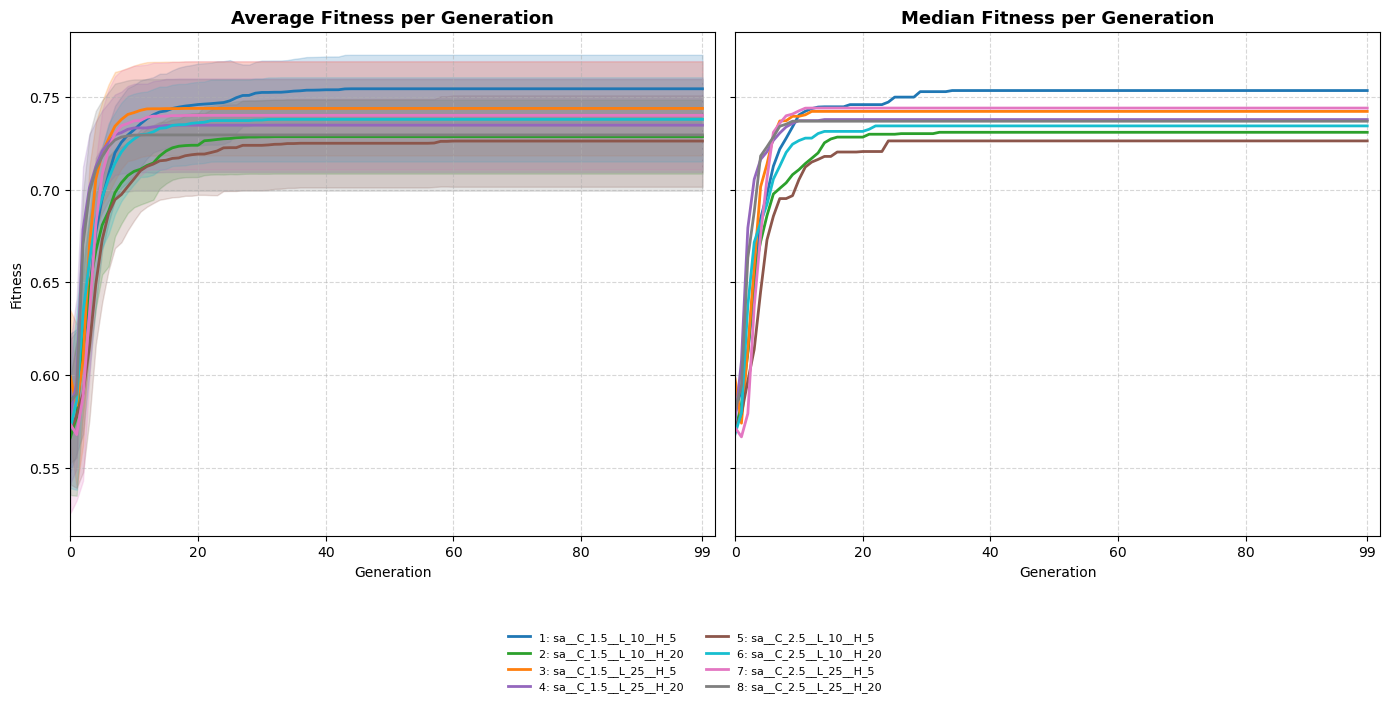

In [43]:
plot_avg_median_fit_per_generation(fitness_dfs_sa)

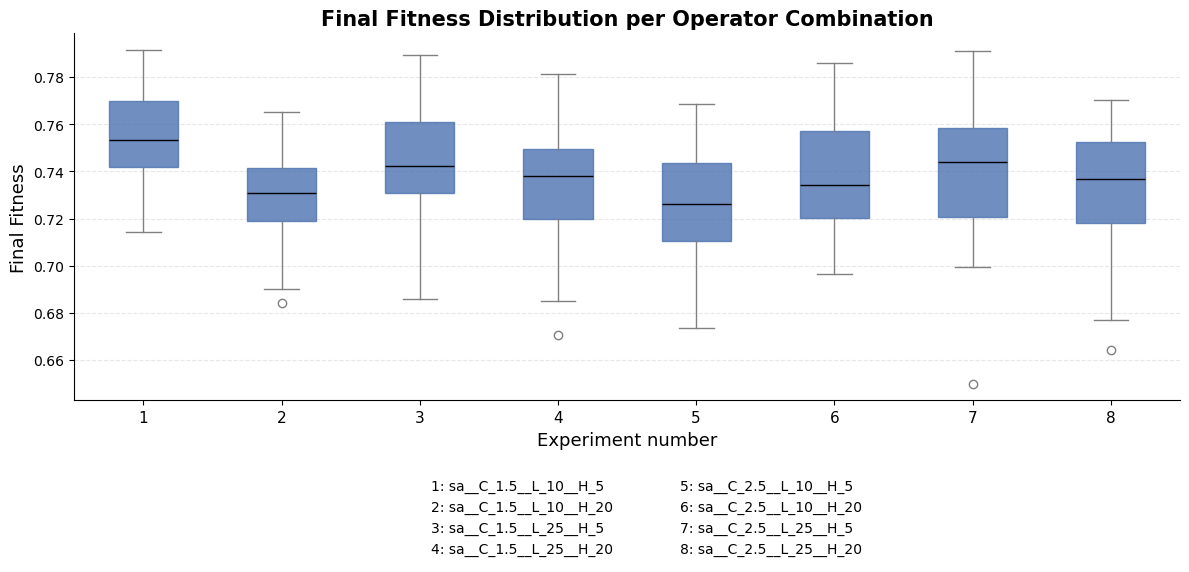

In [44]:
boxplots_final_fitness(fitness_dfs_sa)

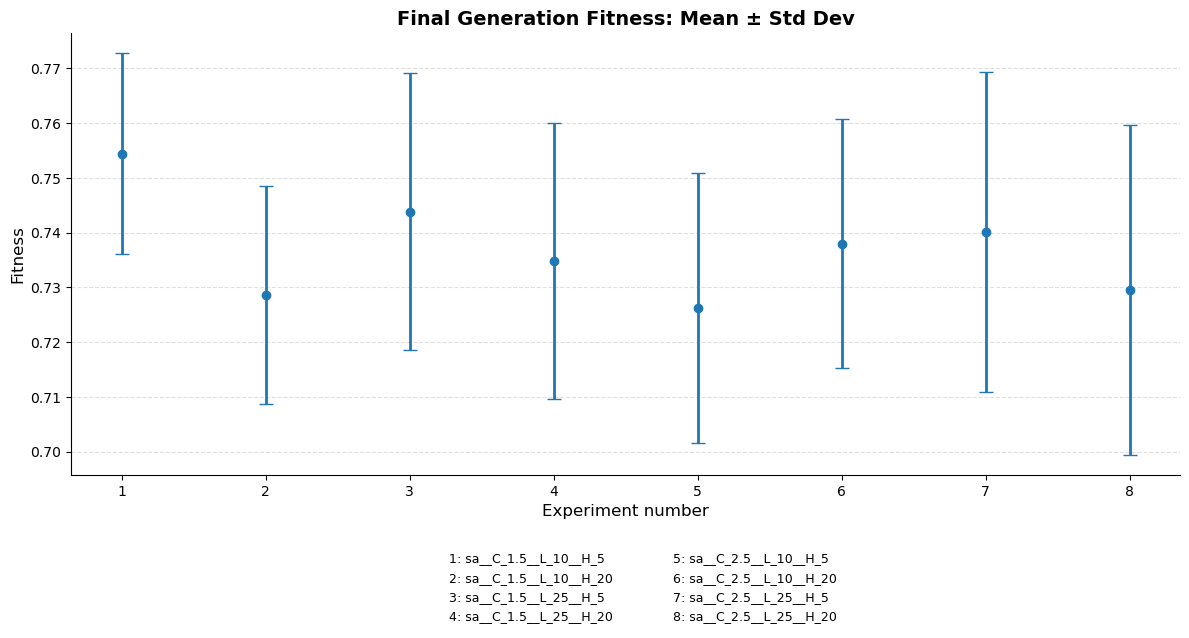

In [45]:
plot_mean_std_error(fitness_dfs_sa)

In [46]:
avg_elapsed_time_table(all_results_sa)

Experience Name  Elapsed Time Avg
1   sa__C_1.5__L_10__H_5          0.103063
2  sa__C_1.5__L_10__H_20          0.100648
3   sa__C_1.5__L_25__H_5          0.268725
4  sa__C_1.5__L_25__H_20          0.235571
5   sa__C_2.5__L_10__H_5          0.108239
6  sa__C_2.5__L_10__H_20          0.100921
7   sa__C_2.5__L_25__H_5          0.256116
8  sa__C_2.5__L_25__H_20          0.227385

In [47]:
compute_wilcoxon_pvalues(fitness_dfs_sa)

sa__C_1.5__L_10__H_5  sa__C_1.5__L_10__H_20  \
sa__C_1.5__L_10__H_5                    NaN                  0.000   
sa__C_1.5__L_10__H_20                 0.000                    NaN   
sa__C_1.5__L_25__H_5                  0.084                  0.047   
sa__C_1.5__L_25__H_20                 0.002                  0.289   
sa__C_2.5__L_10__H_5                  0.000                  0.641   
sa__C_2.5__L_10__H_20                 0.003                  0.140   
sa__C_2.5__L_25__H_5                  0.019                  0.119   
sa__C_2.5__L_25__H_20                 0.000                  0.516   

                       sa__C_1.5__L_25__H_5  sa__C_1.5__L_25__H_20  \
sa__C_1.5__L_10__H_5                  0.084                  0.002   
sa__C_1.5__L_10__H_20                 0.047                  0.289   
sa__C_1.5__L_25__H_5                    NaN                  0.158   
sa__C_1.5__L_25__H_20                 0.158                    NaN   
sa__C_2.5__L_10__H_5                  0.026                  0.114   
sa__C_2.5__L_10__H_20                 0.271                  0.824   
sa__C_2.5__L_25__H_5                  0.715                  0.146   
sa__C_2.5__L_25__H_20                 0.036                  0.584   

                       sa__C_2.5__L_10__H_5  sa__C_2.5__L_10__H_20  \
sa__C_1.5__L_10__H_5                  0.000                  0.003   
sa__C_1.5__L_10__H_20                 0.641                  0.140   
sa__C_1.5__L_25__H_5                  0.026                  0.271   
sa__C_1.5__L_25__H_20                 0.114                  0.824   
sa__C_2.5__L_10__H_5                    NaN                  0.100   
sa__C_2.5__L_10__H_20                 0.100                    NaN   
sa__C_2.5__L_25__H_5                  0.043                  0.584   
sa__C_2.5__L_25__H_20                 0.700                  0.371   

                       sa__C_2.5__L_25__H_5  sa__C_2.5__L_25__H_20  
sa__C_1.5__L_10__H_5                  0.019                  0.000  
sa__C_1.5__L_10__H_20                 0.119                  0.516  
sa__C_1.5__L_25__H_5                  0.715                  0.036  
sa__C_1.5__L_25__H_20                 0.146                  0.584  
sa__C_2.5__L_10__H_5                  0.043                  0.700  
sa__C_2.5__L_10__H_20                 0.584                  0.371  
sa__C_2.5__L_25__H_5                    NaN                  0.135  
sa__C_2.5__L_25__H_20                 0.135                    NaN

# 6. New Representation of Solution for GA

In [56]:
MAX_GEN=100
NUMBER_OF_TESTS=30

In [57]:
grid_params = {
    "crossover": [
        {
            "function": crossover_KAP,
            "xo_prob": random.uniform(1/3, 2/3)
        },
        {
            "function": crossover_KAP,
            "xo_prob": random.uniform(2/3, 1)
        }
    ],
    "mutation": [
        {
            "function": mutation_KA,
            "mut_prob": random.uniform(0, 1/3)
        },
        {
            "function": mutation_KA,
            "mut_prob": random.uniform(1/3, 2/3)
        },


    ],
    "elitism": [True, False]
}

In [ ]:
all_results_test_new_repr=[] # list to store the results for all the experiments
grid = list(itertools.product(grid_params["crossover"], grid_params["mutation"], grid_params["elitism"]))
fitness_dfs_new_repr = {}

for crossover_cfg, mutation_cfg, elitism in grid:

    crossover_function = crossover_cfg["function"]
    xo_prob = crossover_cfg["xo_prob"]
    mutation_function = mutation_cfg["function"]
    mut_prob = mutation_cfg["mut_prob"]
    experiment_name = f"KAP_{mutation_function.__name__}{round(mut_prob,2)}__{crossover_function.__name__}{round(xo_prob,2)}__el_{elitism}"
    print(f"\n\nRunning experiment: {experiment_name}")
    
    result = run_experiment_ga_KAP(
        EXPERIMENT_NAME=experiment_name,
        MUTATION_FUNCTION=mutation_function,
        CROSSOVER_FUNCTION=crossover_function,
        MUT_PROB=mut_prob,
        XO_PROB=xo_prob,
        MAX_GEN=MAX_GEN,
        NUMBER_OF_TESTS=NUMBER_OF_TESTS,
        ELITISM=elitism
    )
    all_results_test_new_repr.append(result)
    fitness_dfs_new_repr[experiment_name] = result['df']




Running experiment: KAP_mutation_KA0.12__crossover_KAP0.55__el_True

Iteration 0 of the genetic algorithm

Final best individual in generation 1: 0.7007049857962636
Final best individual in generation 2: 0.7140681875017366
Final best individual in generation 3: 0.7140681875017366
Final best individual in generation 4: 0.7328783679696459
Final best individual in generation 5: 0.7328783679696459
Final best individual in generation 6: 0.7328783679696459
Final best individual in generation 7: 0.7328783679696459
Final best individual in generation 8: 0.7328783679696459
Final best individual in generation 9: 0.7328783679696459
Final best individual in generation 10: 0.7328783679696459
Final best individual in generation 11: 0.7328783679696459
Final best individual in generation 12: 0.7328783679696459
Final best individual in generation 13: 0.7328783679696459
Final best individual in generation 14: 0.7328783679696459
Final best individual in generation 15: 0.7328783679696459
Final best indi

# 7. Load CSVs with results

In [ ]:
# Initialize dictionaries to store results
fitness_dfs_sa = {}
results_hc = {}
fitness_dfs_ga_el_true = {}
fitness_dfs_ga_el_false = {}
fitness_dfs_ga = fitness_dfs_ga_el_true | fitness_dfs_ga_el_false
fitness_dfs_ga_kap = {}



folder_path = "./results"

# Open the files
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        filepath = os.path.join(folder_path, filename)
        df = pd.read_csv(filepath)
        
        key = filename[:-4]  # Remove ".csv"

        # Determine category by prefix
        if filename.startswith("sa"):
            fitness_dfs_sa[key] = df
        elif filename.startswith("hc"):
            results_hc[key] = df
        elif filename.startswith('KAP'):
            fitness_dfs_ga_kap[key] = df
        else:
            fitness_dfs_ga[key] = df

# 8. Compare GA experiments

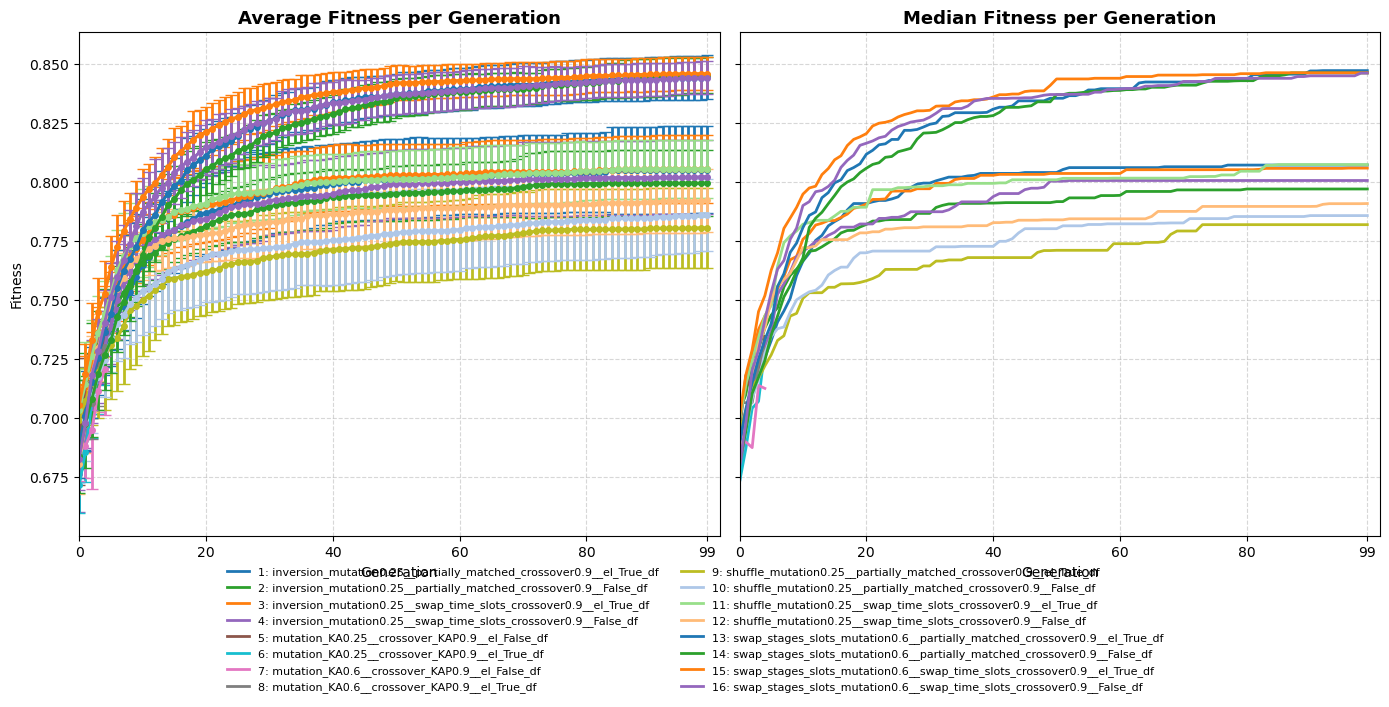

In [8]:
plot_avg_median_fit_per_generation(fitness_dfs_ga, error_bar=True)

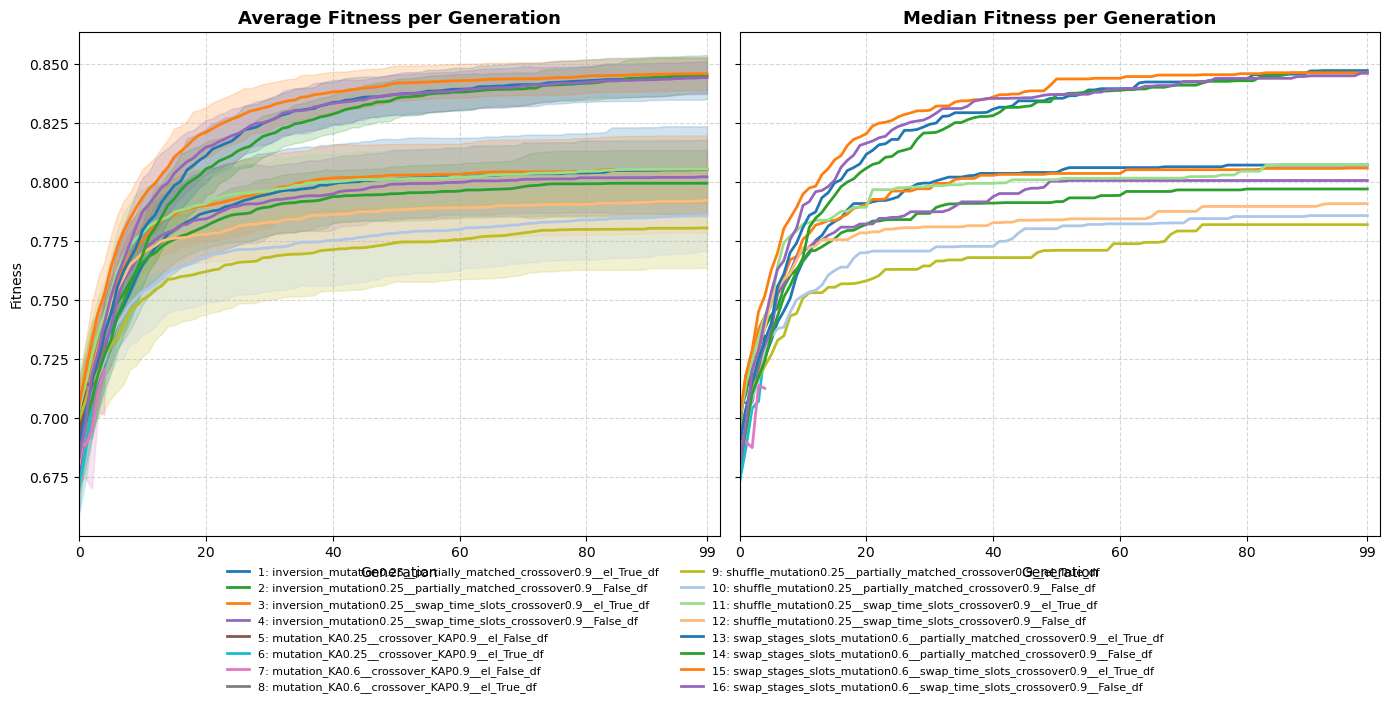

In [9]:
plot_avg_median_fit_per_generation(fitness_dfs_ga, error_bar=False)

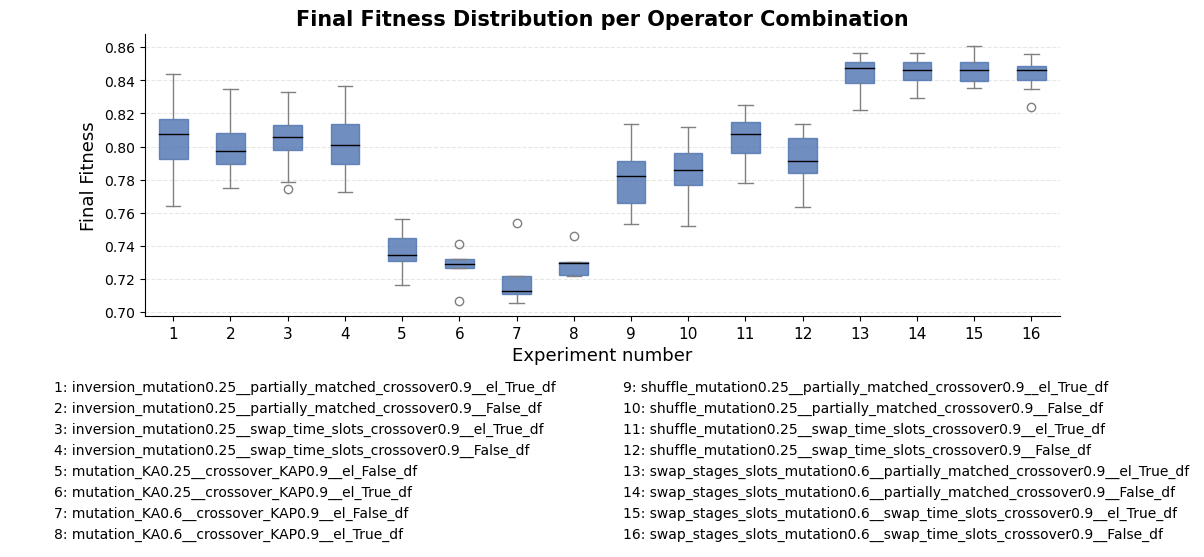

In [10]:
boxplots_final_fitness(fitness_dfs_ga)

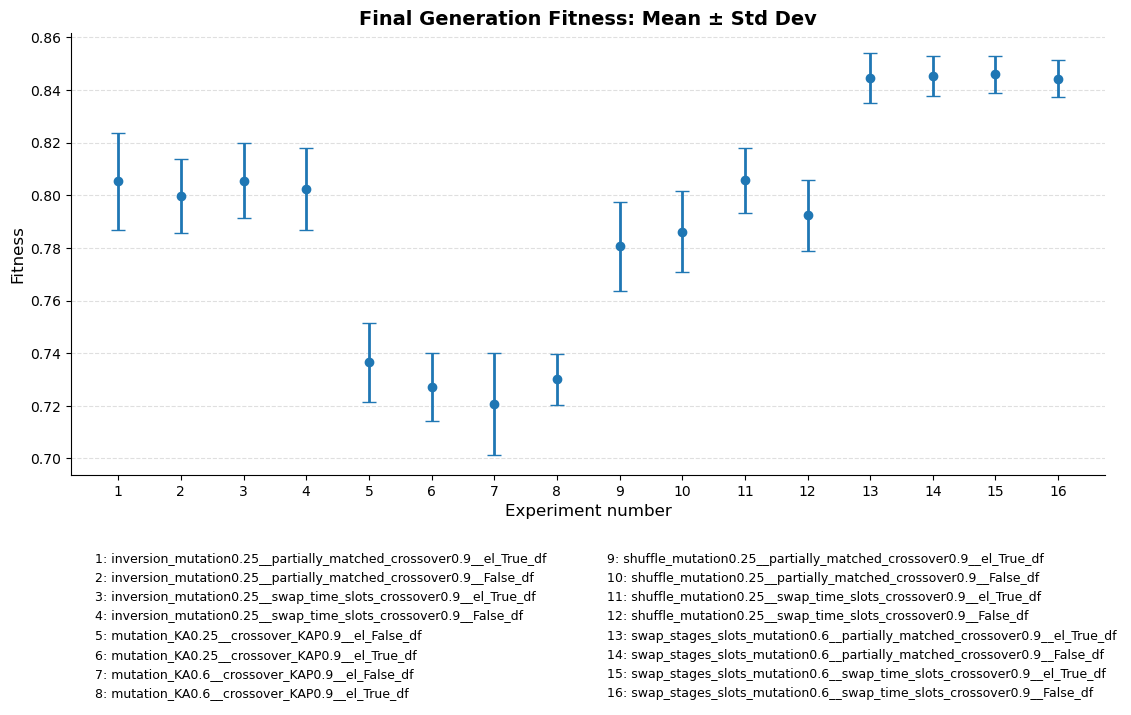

In [11]:
plot_mean_std_error(fitness_dfs_ga)

In [12]:
compute_wilcoxon_pvalues(fitness_dfs_ga)

ValueError: The samples x and y must have the same length.

# 9. Compare GA with diferent a representation

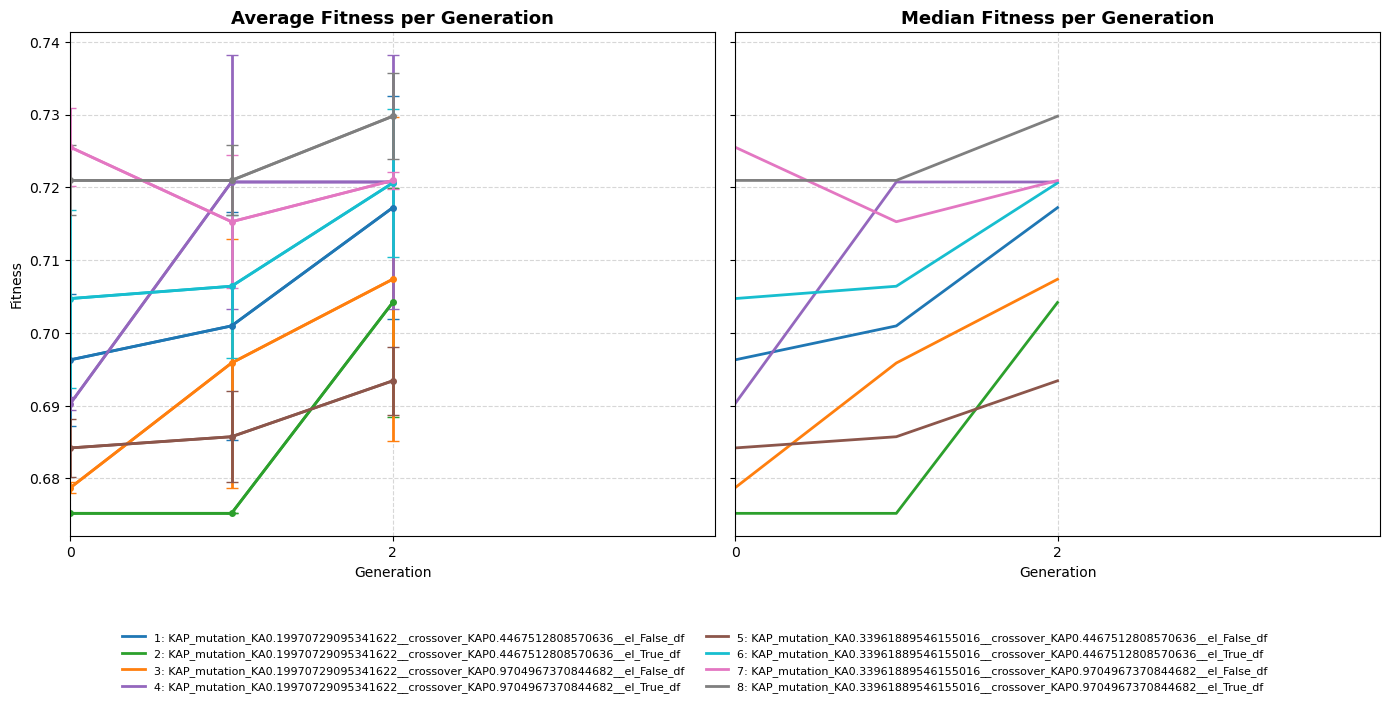

In [51]:
plot_avg_median_fit_per_generation(fitness_dfs_ga_kap, error_bar=True)

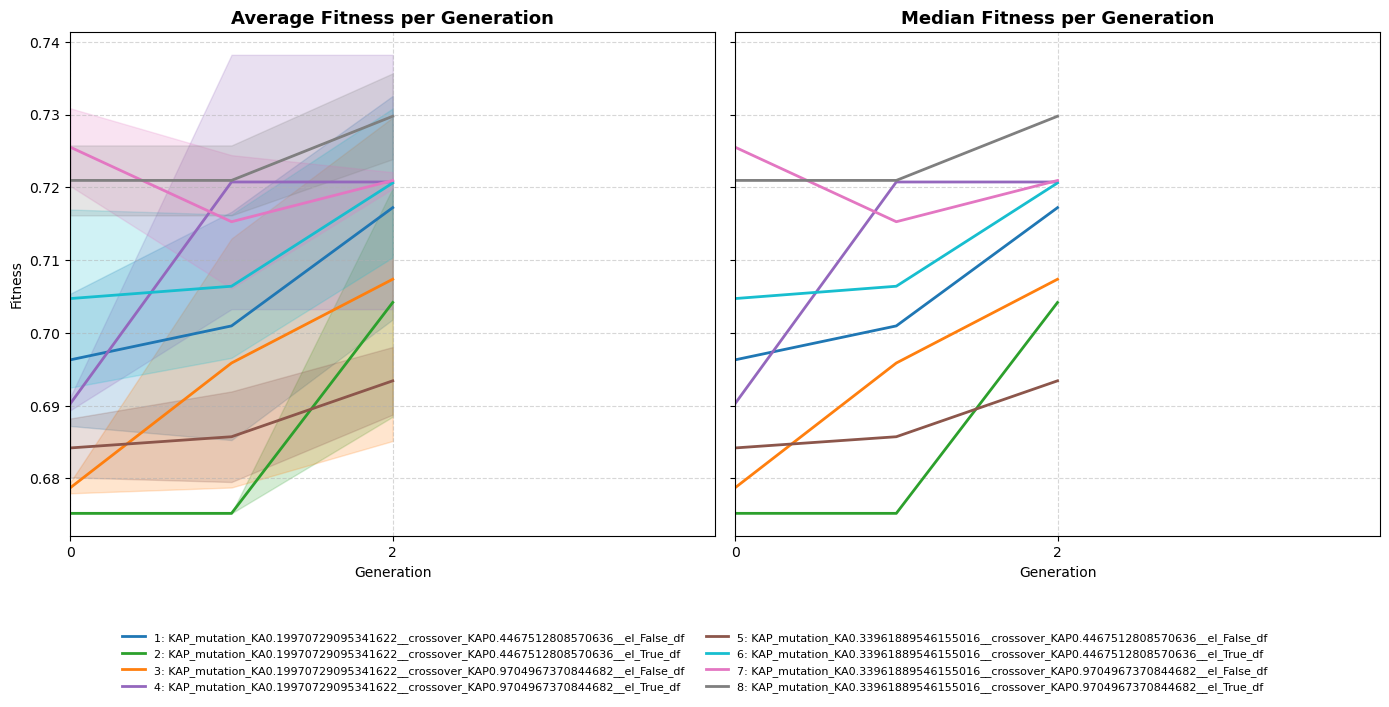

In [52]:
plot_avg_median_fit_per_generation(fitness_dfs_ga_kap, error_bar=False)

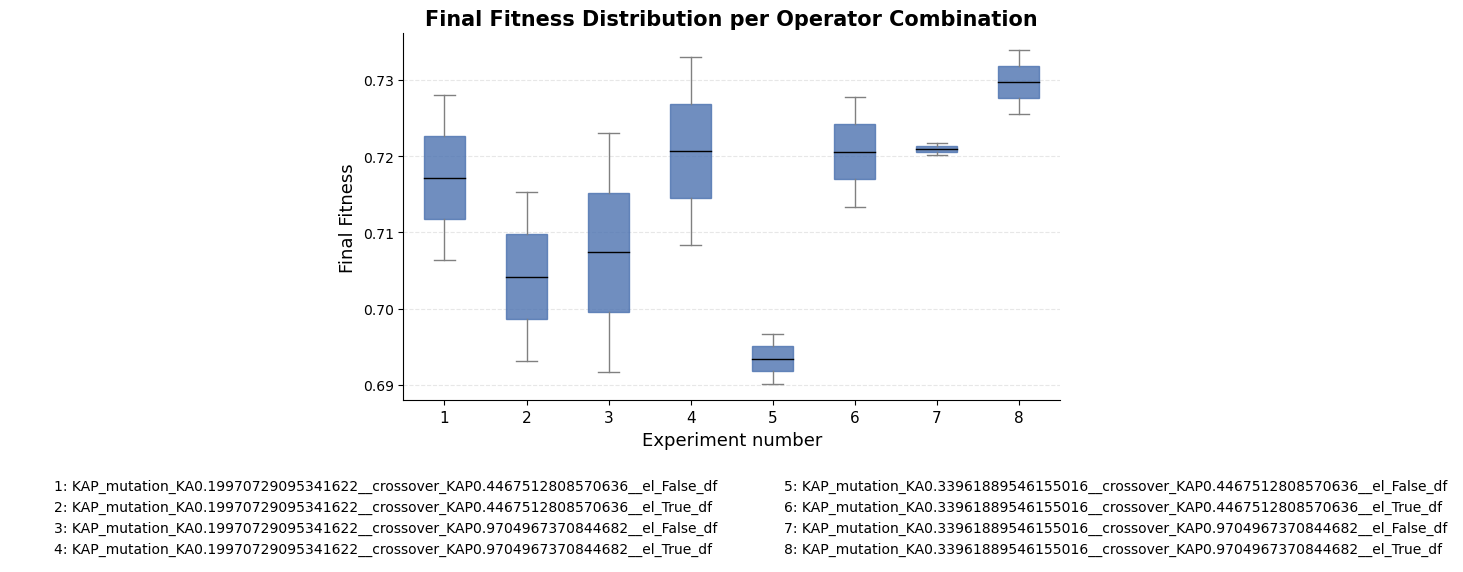

In [53]:
boxplots_final_fitness(fitness_dfs_ga_kap)

In [ ]:
plot_mean_std_error(fitness_dfs_ga_kap)

In [ ]:
compute_wilcoxon_pvalues(fitness_dfs_ga)

# 10. Compare SA experiments

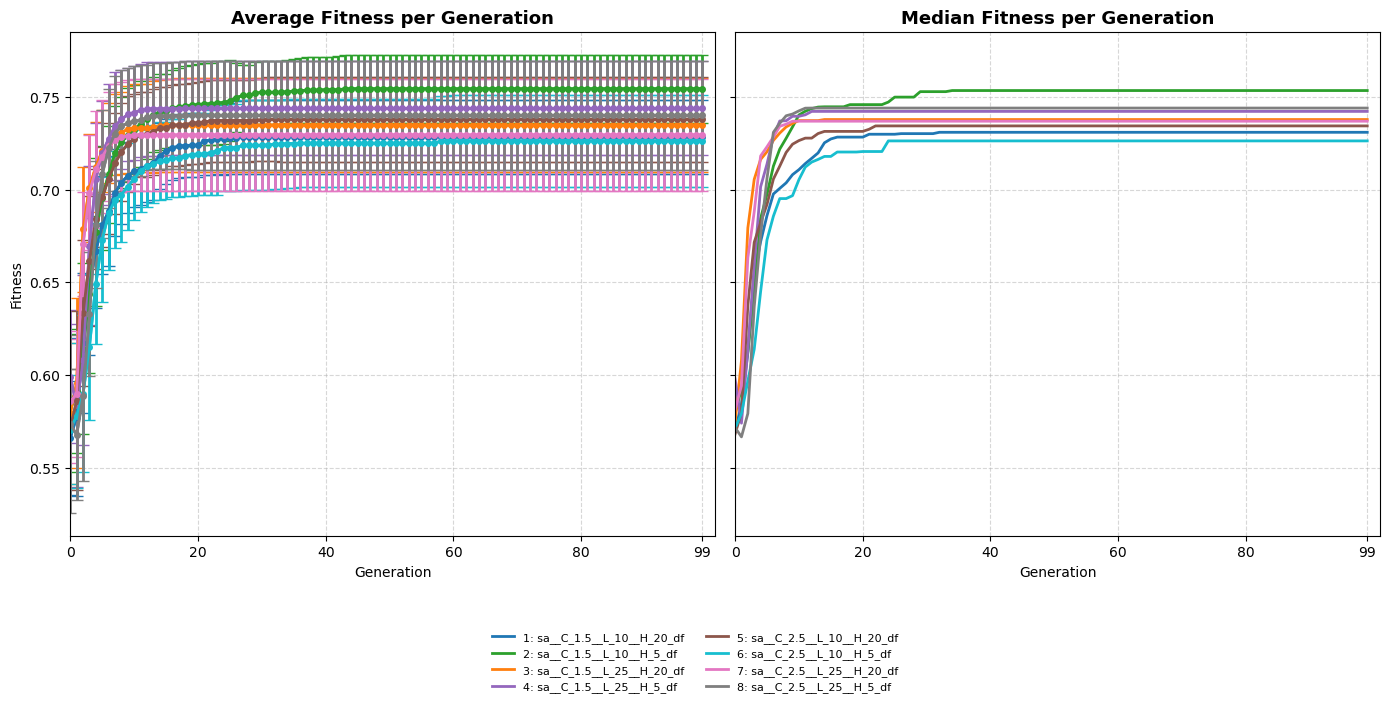

In [15]:
plot_avg_median_fit_per_generation(fitness_dfs_sa, error_bar=True)

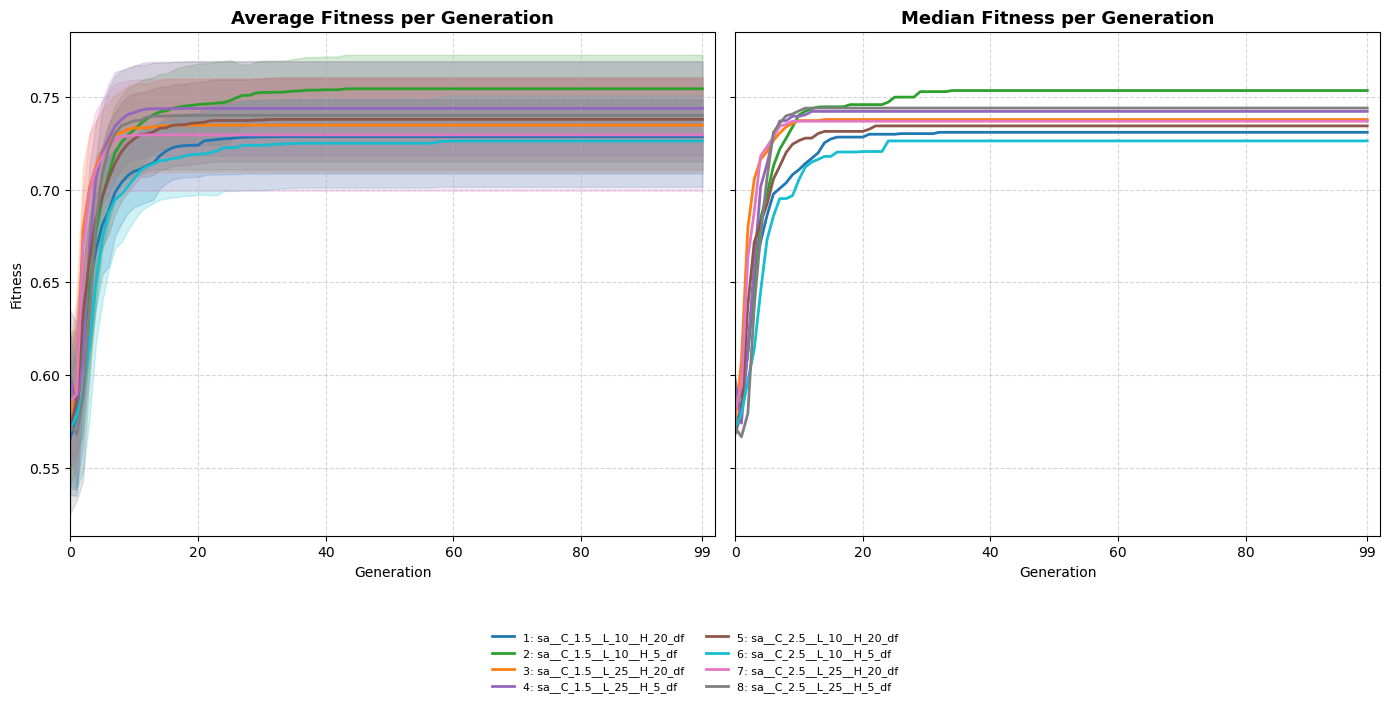

In [16]:
plot_avg_median_fit_per_generation(fitness_dfs_sa, error_bar=False)

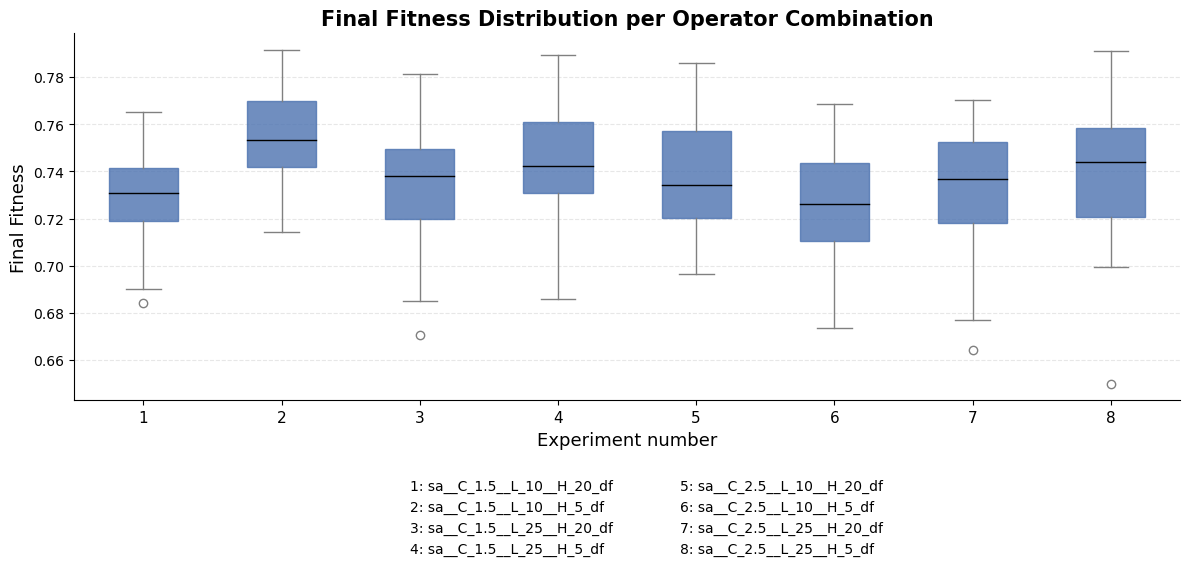

In [17]:
boxplots_final_fitness(fitness_dfs_sa)

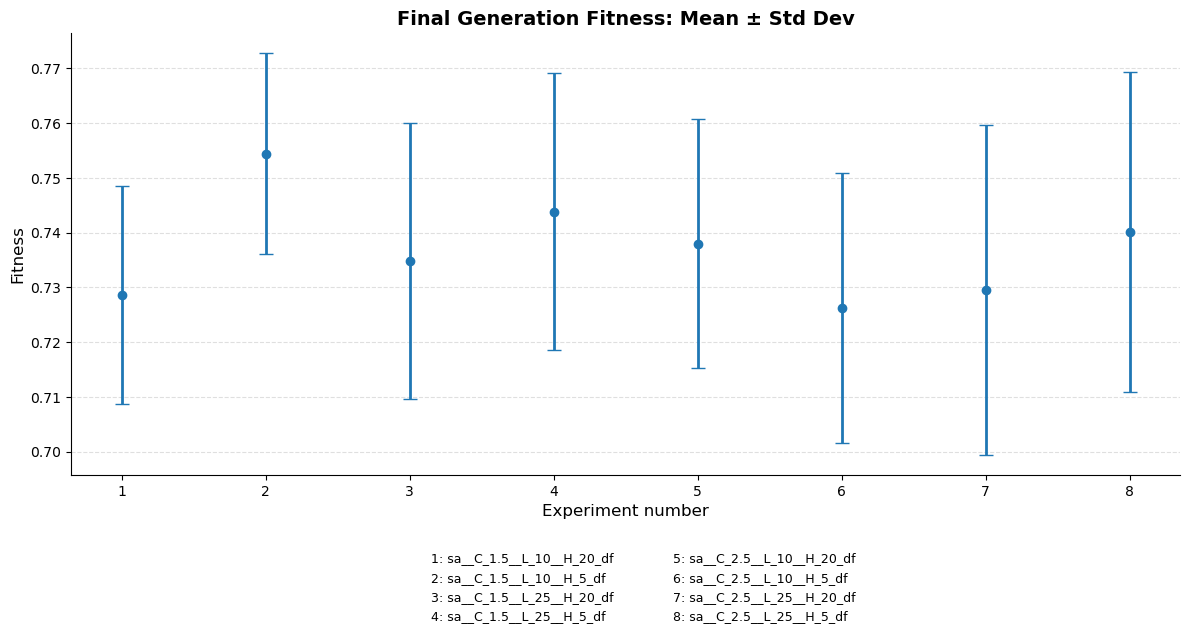

In [18]:
plot_mean_std_error(fitness_dfs_sa)

In [19]:
compute_wilcoxon_pvalues(fitness_dfs_sa)

sa__C_1.5__L_10__H_20_df  sa__C_1.5__L_10__H_5_df  \
sa__C_1.5__L_10__H_20_df                       NaN                    0.000   
sa__C_1.5__L_10__H_5_df                      0.000                      NaN   
sa__C_1.5__L_25__H_20_df                     0.289                    0.002   
sa__C_1.5__L_25__H_5_df                      0.047                    0.084   
sa__C_2.5__L_10__H_20_df                     0.140                    0.003   
sa__C_2.5__L_10__H_5_df                      0.641                    0.000   
sa__C_2.5__L_25__H_20_df                     0.516                    0.000   
sa__C_2.5__L_25__H_5_df                      0.119                    0.019   

                          sa__C_1.5__L_25__H_20_df  sa__C_1.5__L_25__H_5_df  \
sa__C_1.5__L_10__H_20_df                     0.289                    0.047   
sa__C_1.5__L_10__H_5_df                      0.002                    0.084   
sa__C_1.5__L_25__H_20_df                       NaN                    0.158   
sa__C_1.5__L_25__H_5_df                      0.158                      NaN   
sa__C_2.5__L_10__H_20_df                     0.824                    0.271   
sa__C_2.5__L_10__H_5_df                      0.114                    0.026   
sa__C_2.5__L_25__H_20_df                     0.584                    0.036   
sa__C_2.5__L_25__H_5_df                      0.146                    0.715   

                          sa__C_2.5__L_10__H_20_df  sa__C_2.5__L_10__H_5_df  \
sa__C_1.5__L_10__H_20_df                     0.140                    0.641   
sa__C_1.5__L_10__H_5_df                      0.003                    0.000   
sa__C_1.5__L_25__H_20_df                     0.824                    0.114   
sa__C_1.5__L_25__H_5_df                      0.271                    0.026   
sa__C_2.5__L_10__H_20_df                       NaN                    0.100   
sa__C_2.5__L_10__H_5_df                      0.100                      NaN   
sa__C_2.5__L_25__H_20_df                     0.371                    0.700   
sa__C_2.5__L_25__H_5_df                      0.584                    0.043   

                          sa__C_2.5__L_25__H_20_df  sa__C_2.5__L_25__H_5_df  
sa__C_1.5__L_10__H_20_df                     0.516                    0.119  
sa__C_1.5__L_10__H_5_df                      0.000                    0.019  
sa__C_1.5__L_25__H_20_df                     0.584                    0.146  
sa__C_1.5__L_25__H_5_df                      0.036                    0.715  
sa__C_2.5__L_10__H_20_df                     0.371                    0.584  
sa__C_2.5__L_10__H_5_df                      0.700                    0.043  
sa__C_2.5__L_25__H_20_df                       NaN                    0.135  
sa__C_2.5__L_25__H_5_df                      0.135                      NaN

# 11. HC Result

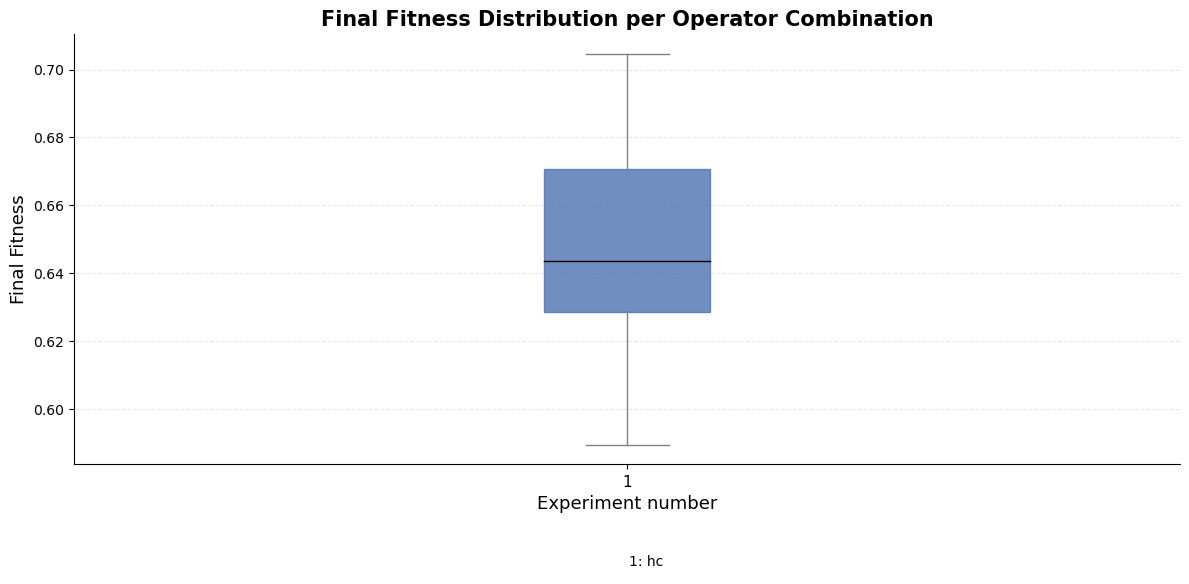

In [20]:
boxplots_final_fitness(results_hc)

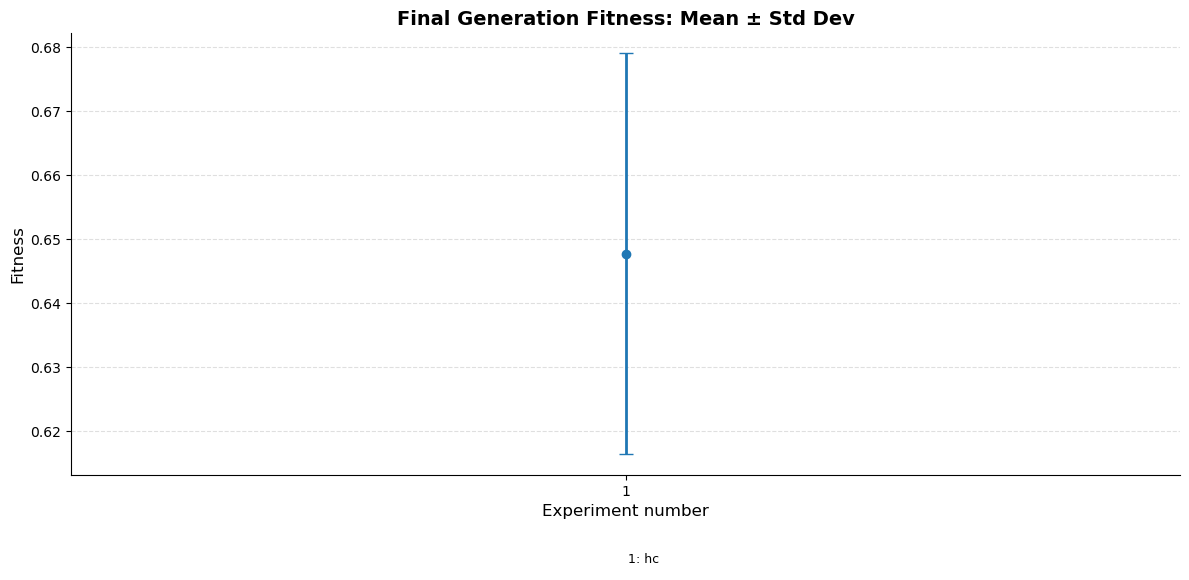

In [21]:
plot_mean_std_error(results_hc)

# 12. Compare GA, SA and HC

In [ ]:
# Store the best results of each algorithm - GA, SA and HC
results_ga_sa_hc={}
results_ga_sa_hc['BEST_SA'] = pd.DataFrame({
    "Fitness_max": fitness_dfs_sa['sa__C_1.5__L_10__H_20_df'].iloc[:, -1]
})

results_ga_sa_hc['BEST_GA'] = pd.DataFrame({
    "Fitness_max": fitness_dfs_ga['inversion_mutation0.25__partially_matched_crossover0.9__el_True_df'].iloc[:, -1]
})

results_ga_sa_hc['BEST_HC'] = results_hc['hc']

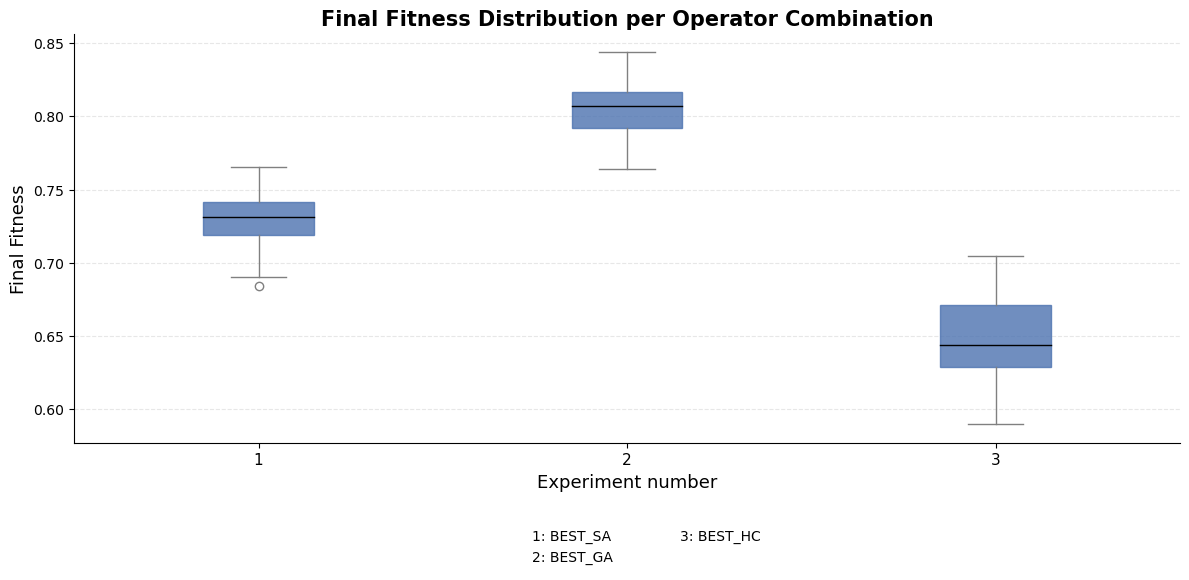

In [40]:
boxplots_final_fitness(results_ga_sa_hc)

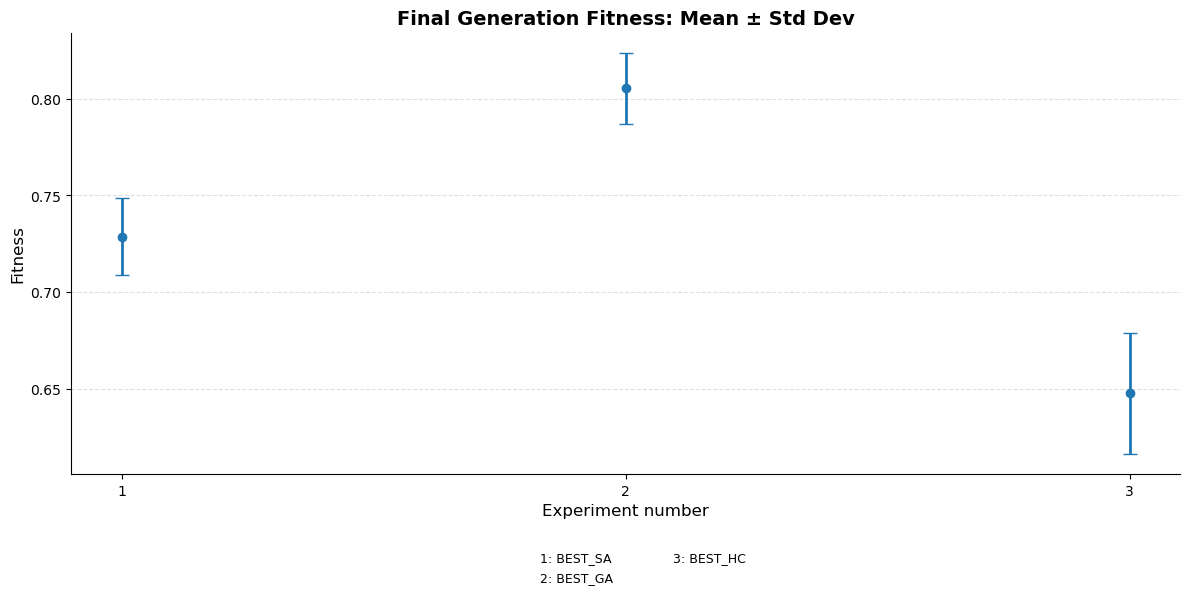

In [41]:
plot_mean_std_error(results_ga_sa_hc)

# 13. Best algorithm solution with artists stages and slots

In [ ]:
initial_population = [
    LUGASolution(
        crossover_function=CROSSOVER_FUNCTION,
        mutation_function=MUTATION_FUNCTION
    )
    for _ in range(50)
    ]
best_solution=genetic_algorithm(
    initial_population=initial_population,
    max_gen=100,
    selection_algorithm=tournament_selection,
    k_tournment_selection = 2,
    maximization = True,
    xo_prob=,
    mut_prob=,
    mut_max_window_size=5,
    elitism=True
)

In [ ]:
print(best_solution)